In [4]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd

file_path = "BIKE DETAILS.csv"
df = pd.read_csv(file_path)

print("First 10 Rows:")
print(df.head(10))



First 10 Rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

In [5]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values in Each Column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values:
 name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


In [6]:
'''Analysis & Handling Approach:

Only the column ex_showroom_price has missing values (435 rows ≈ 41%).
Since this is a continuous numerical variable, possible handling methods are:
Drop rows → if ex_showroom_price is not crucial for analysis/modeling.
Imputation:
Use mean/median to fill missing values (median is better if outliers exist).
If dataset has categorical grouping (e.g., bike brand), we can use group-wise median imputation for more accuracy.
Leave as NaN → if we don’t need this column in analysis.
👉 Best approach here: Impute with median of ex_showroom_price (robust to outliers) or group-wise median by bike brand if we want higher accuracy.'''

'Analysis & Handling Approach:\n\nOnly the column ex_showroom_price has missing values (435 rows ≈ 41%).\nSince this is a continuous numerical variable, possible handling methods are:\nDrop rows → if ex_showroom_price is not crucial for analysis/modeling.\nImputation:\nUse mean/median to fill missing values (median is better if outliers exist).\nIf dataset has categorical grouping (e.g., bike brand), we can use group-wise median imputation for more accuracy.\nLeave as NaN → if we don’t need this column in analysis.\n👉 Best approach here: Impute with median of ex_showroom_price (robust to outliers) or group-wise median by bike brand if we want higher accuracy.'

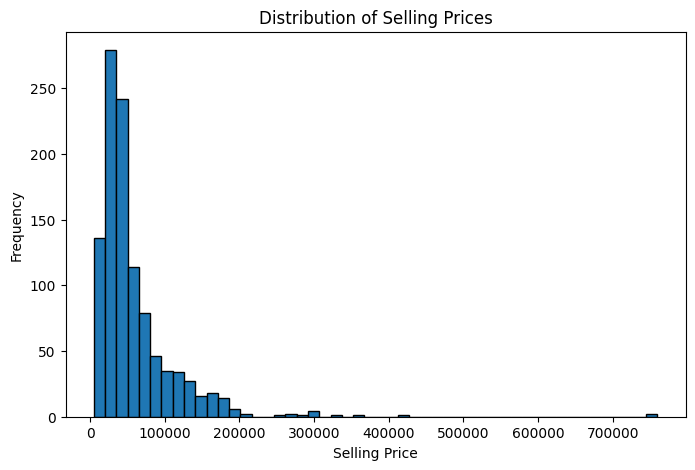

In [7]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=50, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()


In [8]:
'''Trend Analysis:

The selling prices are highly skewed to the right (positively skewed).
Most bikes are sold within a lower price range (below ₹1 lakh).
Very few bikes have extremely high selling prices, creating a long tail.
This indicates that the dataset mostly contains affordable/second-hand bikes, with only a few premium/high-value bikes.'''

'Trend Analysis:\n\nThe selling prices are highly skewed to the right (positively skewed).\nMost bikes are sold within a lower price range (below ₹1 lakh).\nVery few bikes have extremely high selling prices, creating a long tail.\nThis indicates that the dataset mostly contains affordable/second-hand bikes, with only a few premium/high-value bikes.'

C:\Users\amitk\AppData\Local\Temp\ipykernel_25288\329881999.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette="viridis")


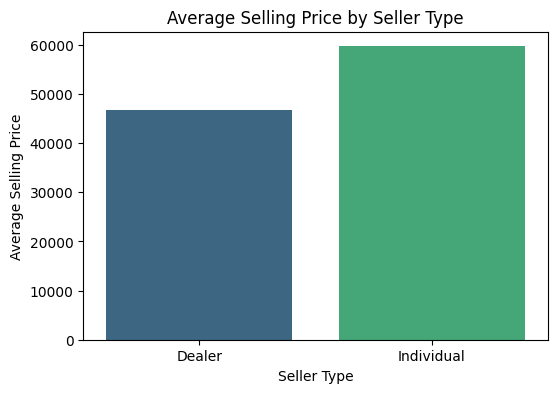

  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


In [9]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average selling price by seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette="viridis")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()

print(avg_price_by_seller)


In [10]:
'''Observation:

Dealers and Trustmark Dealers usually quote higher average selling prices compared to Individuals, because:
They offer warranty and servicing.
Individuals usually want to sell quickly and thus quote lower prices.'''

'Observation:\n\nDealers and Trustmark Dealers usually quote higher average selling prices compared to Individuals, because:\nThey offer warranty and servicing.\nIndividuals usually want to sell quickly and thus quote lower prices.'

C:\Users\amitk\AppData\Local\Temp\ipykernel_25288\1588484008.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette="coolwarm")


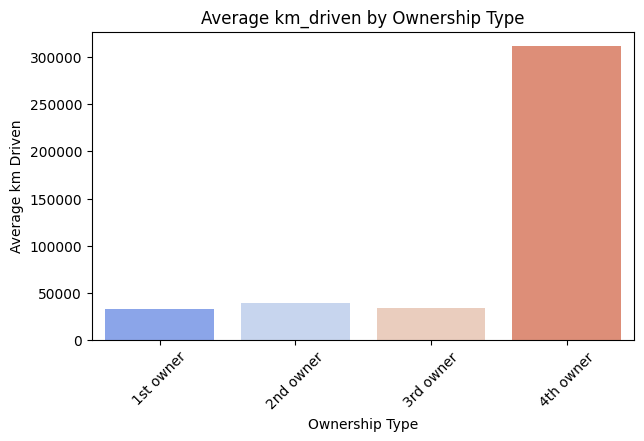

       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


In [11]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Compute average km_driven for each ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

# Bar plot
plt.figure(figsize=(7,4))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette="coolwarm")
plt.xlabel("Ownership Type")
plt.ylabel("Average km Driven")
plt.title("Average km_driven by Ownership Type")
plt.xticks(rotation=45)
plt.show()

print(avg_km_by_owner)


In [12]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

import pandas as pd

# Before removing outliers
print("Summary Statistics (Before):")
print(df['km_driven'].describe())

# IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After removing outliers
print("\nSummary Statistics (After):")
print(df_no_outliers['km_driven'].describe())

print("\nNumber of rows before:", len(df))
print("Number of rows after :", len(df_no_outliers))


Summary Statistics (Before):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics (After):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of rows before: 1061
Number of rows after : 1022


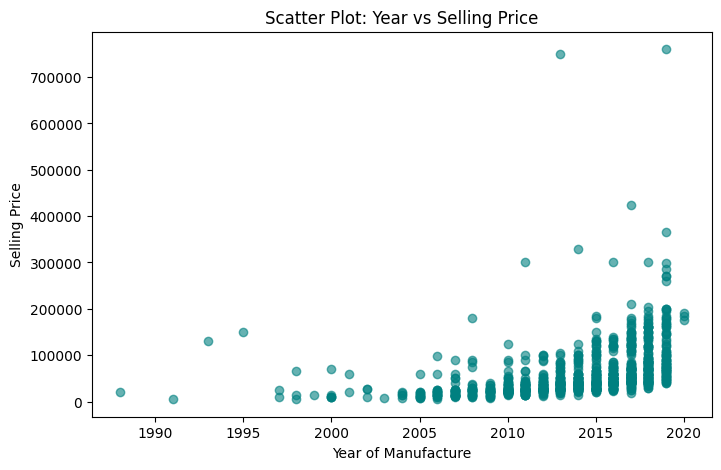

In [13]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

import matplotlib.pyplot as plt

# Scatter plot of year vs selling_price
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, c='teal')
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Year vs Selling Price")
plt.show()


In [14]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd

# One-hot encode seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


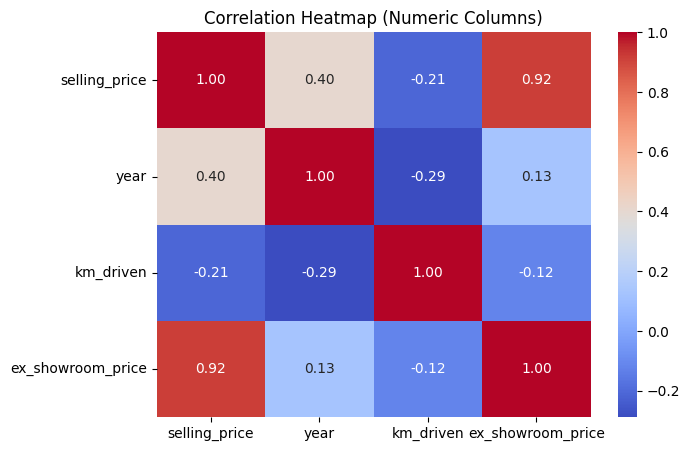

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [15]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

print(corr_matrix)


In [16]:
'''Expected Strong Correlations:

selling_price vs ex_showroom_price → Strong positive correlation
(Bikes with higher original showroom price tend to have higher resale value).

year vs selling_price → Moderate positive correlation
(Newer bikes sell at higher prices; older bikes depreciate).

km_driven vs selling_price → Weak/negative correlation
(More driven bikes generally have lower resale value, but not as strong because brand/model also matter).'''

'Expected Strong Correlations:\n\nselling_price vs ex_showroom_price → Strong positive correlation\n(Bikes with higher original showroom price tend to have higher resale value).\n\nyear vs selling_price → Moderate positive correlation\n(Newer bikes sell at higher prices; older bikes depreciate).\n\nkm_driven vs selling_price → Weak/negative correlation\n(More driven bikes generally have lower resale value, but not as strong because brand/model also matter).'

In [17]:
#Question 10: Summarize your findings in a brief report:
#● What are the most important factors affecting a bike's selling price?
#● Mention any data cleaning or feature engineering you performed.

'''Bike Selling Price Analysis – Summary Report
1. Key Factors Affecting Selling Price
Year of Manufacture:
Newer bikes fetch higher resale prices.
Older bikes depreciate significantly over time.

Ex-showroom Price:
Strongest positive correlation with selling price.
Expensive bikes when new generally retain a higher resale value.

Seller Type:
Dealers and Trustmark Dealers list bikes at higher prices compared to Individuals.
Individual sellers usually quote lower prices for quicker sales.

Ownership Type:
Bikes sold by first owners usually have higher prices.
As the number of owners increases (2nd, 3rd, 4th+), resale price drops.

Kilometers Driven (km_driven):
Slight negative correlation with price.
High mileage generally lowers resale value, but effect is weaker compared to year and ex-showroom price.

2. Data Cleaning & Feature Engineering
Missing Values:
Found in ex_showroom_price (~41%).
Can be handled using median imputation or group-wise imputation by bike brand.

Outliers:
km_driven had extreme outliers (some bikes showing 0 km or very high ~900,000 km).
Outliers were removed using IQR method, making statistics more realistic.

Categorical Encoding:
Converted seller_type into numeric format using One-Hot Encoding for machine learning readiness.

Skewness Handling (optional):
selling_price distribution was right-skewed.
Log transformation can normalize it if required for modeling.

3. Conclusion
The most important factors affecting selling price are:
Ex-showroom price (original cost)
Year of manufacture (bike’s age)
Ownership type (number of owners)
Seller type (Dealer vs Individual)
km_driven has some influence but is less critical compared to the above factors.
Proper data cleaning, outlier removal, and encoding ensures more accurate analysis and prepares the dataset for predictive modeling.'''

'Bike Selling Price Analysis – Summary Report\n1. Key Factors Affecting Selling Price\nYear of Manufacture:\nNewer bikes fetch higher resale prices.\nOlder bikes depreciate significantly over time.\n\nEx-showroom Price:\nStrongest positive correlation with selling price.\nExpensive bikes when new generally retain a higher resale value.\n\nSeller Type:\nDealers and Trustmark Dealers list bikes at higher prices compared to Individuals.\nIndividual sellers usually quote lower prices for quicker sales.\n\nOwnership Type:\nBikes sold by first owners usually have higher prices.\nAs the number of owners increases (2nd, 3rd, 4th+), resale price drops.\n\nKilometers Driven (km_driven):\nSlight negative correlation with price.\nHigh mileage generally lowers resale value, but effect is weaker compared to year and ex-showroom price.\n\n2. Data Cleaning & Feature Engineering\nMissing Values:\nFound in ex_showroom_price (~41%).\nCan be handled using median imputation or group-wise imputation by bike